# Import modules

In [1]:
# Code by: O, Wani, 2021

import numpy as np                      # for scientific computing and array analysis
import pandas as pd                     # for working with data structures
from scipy.integrate import odeint      # for working with ordinary differential equations
import scipy.stats as stats
import scipy.signal as sg

# displaying plots inline 
%matplotlib inline                      

import matplotlib.pyplot as plt         # for 2D plotting

import math                             # for mathematical functions defined by the C standard
import statsmodels.api as sm            # for autocorrelation function
import os                               # for interacting with the operating system
import seaborn as sns                   # for 3D plotting
import astroabc                         # for inference of SDE parameters
import ipynb                            # for importing ipynb files as modules
import random                           # for pseudo-random number generators
import timeit
from scipy.optimize import minimize     # for minimization

os.chdir('/home/owani/Office/Berkeley/Scripts/sde') # set working directory


In [2]:
from ipynb.fs.full.import_data import get_data, get_station_name 
# Import data

# import helper functions
from CatchmentBasics import *
from Data_analysis_helper import *

# Load data


In [3]:
watershed = ['1-EastRiver', '2-DryCreek','3-Sagehen','4-HJAndrews','5-Baltimore',
             '6-Bonanza','7-CCE','8-CentralArizona','9-Coweeta','10-Florida',
             '11-Georgia','12-Harvard','13-Hubbard','14-Jornada','15-Kellogg',
             '16-KonzaPrairie','17-NGA','18-PlumIsland','19-Sevilleta','20-Boulder',
             '21-Catalina','22-Jemez','23-WhiteClay','24-Luquillo','25-Reynolds',
             '26-ShaleHill','27-SanJoaquin','28-Providence','29-Wolverton','30-Calhoun']

In [4]:
# Define variables that contain the data of all catchments
discharge_obs= np.zeros([7,3640])
discharge_real= np.zeros([7,3640])
rain_obs = np.zeros([7,3640])
Temp_obs = np.zeros([7,3640])

In [5]:
%%capture

#  PlumIsland     - 18
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(18,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(18,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['PIE_Precipitation'])
A_discharge = np.asarray(get_data(18,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['Middleton_Discharge'])
discharge_real[0,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[0,:] = discharge
rain_obs[0,:] = rain
Temp_obs[0,:] = Temp



# Kellog 15
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(15,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(15,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['KBS002_Precipitation'])
A_discharge = np.asarray(get_data(15,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['KBS096_Discharge'])
discharge_real[1,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[1,:] = discharge
rain_obs[1,:] = rain
Temp_obs[1,:] = Temp

#  Harvard       - 12
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(12,['AirTemperature']).loc['2008-1-1':'2018-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(12,['Precipitation']).loc['2008-1-1':'2018-1-1'][0:3640]['HF001_Precipitation'])
A_discharge = np.asarray(get_data(12,['Discharge']).loc['2008-1-1':'2018-1-1'][0:3640]['NelsonWeir_Discharge'])
discharge_real[2,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[2,:] = discharge
rain_obs[2,:] = rain
Temp_obs[2,:] = Temp



#HJ Andrews
# load time series of rainfall, discharge, temperature 

Temp = np.array(get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
A_discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['GSLOOK_Discharge'])
discharge_real[3,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[3,:] = discharge
rain_obs[3,:] = rain
Temp_obs[3,:] = Temp
#temp = get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_AirTemperature_50cm']
#temp[temp<0]=0
#swe = get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_SWE']
#sweb = swe/np.amax(swe)


# CCE 7
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(7,['AirTemperature']).loc['2002-1-1':'2012-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(7,['Precipitation']).loc['2002-1-1':'2012-1-1'].mean(axis=1))[0:3640]#['Station1_Precipitation'])
A_discharge = np.asarray(get_data(7,['Discharge']).loc['2002-1-1':'2012-1-1'][0:3640]['FashionValley_Discharge'])
discharge_real[4,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[4,:] = discharge
rain_obs[4,:] = rain
Temp_obs[4,:] = Temp

# Hubbard 13
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(13,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(13,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['WS7_Precipitation'])
A_discharge = np.asarray(get_data(13,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['WS7_Discharge'])
discharge_real[5,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[5,:] = discharge
rain_obs[5,:] = rain
Temp_obs[5,:] = Temp


# Luquillo 24
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(24,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
Temp = np.nan_to_num(Temp)
rain =  np.asarray(get_data(24,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['Bisley2_Precipitation'])
A_discharge = np.asarray(get_data(24,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['RioMameyes_Discharge'])
discharge_real[6,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[6,:] = discharge
rain_obs[6,:] = rain
Temp_obs[6,:] = Temp




# Define SDE

The rainfall runoff model can be described as a stochastic differential equation:


$d\mathcal{S}_t= [\mathcal{R}_t+\mathcal{M}_t-\mathcal{E}_t-\mathcal{Q}_t]\cdot dt+g(\mathcal{S}_t,\mathcal{R}_t)\cdot dW_t$ 

We see that: $ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{(d\mathcal{S}/dt)}$

Such that:
$ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{\mathcal{R}_t-\mathcal{Q}_t-\mathcal{M}_t-\mathcal{E}_t}$

We know that the recession equation for catchments, according to Brutsaert and Nieber [1977], is:
$-d\mathcal{Q}/dt = a\mathcal{Q}^b$

Assuming: $\mathcal{Q} \gg \mathcal{R}, \mathcal{M}, \mathcal{E} \\$
$ d\mathcal{Q}/d\mathcal{S} = \frac{(d\mathcal{Q}/dt)}{-\mathcal{Q}}$;
$ d\mathcal{Q}/d\mathcal{S} = a\mathcal{Q}^{b-1}$

Integrating both sides

$\int d\mathcal{S} = \int \frac{1}{a}\mathcal{Q}^{1-b}d\mathcal{Q}\\ $
$\mathcal{Q}=f(\mathcal{S})=\mathcal{Q_{ref}}(\mathcal{S}-\mathcal{S_o})^{1/(2-b)}/k$

Now let us define our modules for snowmelt and evapotranspiration 
(assuming they will have model deficits, which will be taken into account by the stochasticity in the SDE)

$\mathcal{M} = \texttt{ddf}\cdot (T-T_1)\\$
$\mathcal{E} =  E_{max}\cdot \frac{(T-T_{min})}{(T_{max}-T_{min})} + E_{min}\cdot \frac{(T_{max}-T)}{(T_{max}-T_{min})}$

The final effective discharge will be equal to 
$\mathcal{Q_{eff}}=A\cdot \mathcal{Q}$

The subprocesses we have: $\mathcal{S},\mathcal{R},\mathcal{M},\mathcal{E}$

The parameters we have: $A,b,k,\mathcal{S_o},\mathcal{Q_{ref}},\texttt{ddf},E_{max},E_{min}$

In [6]:
# Plots with uncertainty intervals

def sde(par, rain, Temp, runs, dt =1 , T = 3640):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    bf = par[5]; es=par[6] 
    
    M = ddf*np.maximum(Temp,0)
    
    for j in range(runs):
        for i in range(n - 1):
            x[i + 1,j] =max(0,(bf + x[i,j] + (rain[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*np.random.normal(0,np.sqrt(dt),1)))

        if np.isnan(np.sum(A*(Qref*((x[0:n,j])/k)**(1/(2-b)))))==False:
                try:
                    Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))        
                except:
                    Qeff[:,j] = np.full(n,np.inf)
                 
        else: 
            Qeff[:,j] = np.full(n,np.inf)
    
    return Qeff 

In [7]:
# ar-1 model
def sde(par, rain, Temp, runs, dt =1 , T = 3640):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    bf = par[5]; es=par[6] 
    
    M = ddf*np.maximum(Temp,0)
    

    
    for j in range(runs):
        
        ys = np.zeros(T)
        for i in range(0,T-1):
            ys[i+1]= -ys[i]*0.1+np.random.normal(0,0.5,1)
            
        for i in range(n - 1):
            x[i + 1,j] =max(0,(bf + x[i,j] + (rain[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*ys[i]))

        if np.isnan(np.sum(A*(Qref*((x[0:n,j])/k)**(1/(2-b)))))==False:
                try:
                    Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))        
                except:
                    Qeff[:,j] = np.full(n,np.inf)
                 
        else: 
            Qeff[:,j] = np.full(n,np.inf)
    
    return Qeff 


Text(0.5, 1.0, 'Plum Island (black - observation; red - ensemble members from SDE )')

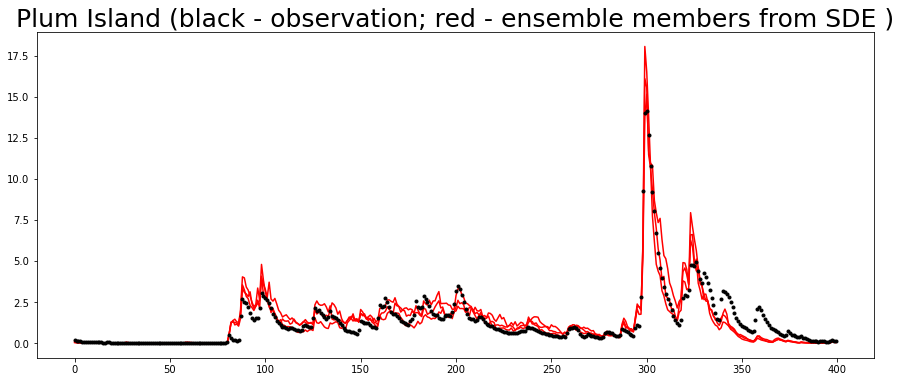

In [8]:
i=0
plt.figure(figsize=(15,6))
plt.plot(sde([ 3.88029872e-01,  1.46129972e+00,  1.81645402e+00,
         1.95657777e-03, -1.93286730e-01,  8.90730747e-01,0.1], (rain_obs[i,:]), Temp_obs[i,:],runs =3)[200:600],color="red")
plt.plot(discharge_obs[i,200:600],'.', color="black")
plt.title('Plum Island (black - observation; red - ensemble members from SDE )', size =25)

# Optimized parameters


In [9]:
# reduced uncertainty
#{'A','b','k','Qref','ddf','bf','es'}  
paroptim_sde = np.array([[ 3.88029872e-01,  1.46129972e+00,  1.81645402e+00,
         1.95657777e-03, -1.93286730e-01,  8.90730747e-01,
         1.10000000e-01],
       [ 1.09302846e-01,  1.19353000e+00,  5.66851599e-01,
         3.40158515e-02, -1.68654197e-01,  8.56218306e+00,
         1.110000000e-01],
       [ 3.66627229e-01,  1.53251235e+00,  1.55188223e+00,
         1.44643023e-03, -2.05917872e-01,  0.25566027e+00,
         1.20000000e-01],
       [ 8.90134090e-02,  1.76433531e+00,  3.80138065e+00,
         6.47642993e-08, -3.38119087e-01,  2.27610689e+00,
         1.2000000e-01],
       [ 6.99994621e+00,  9.52389865e-01,  1.09187706e+00,
         9.07094522e-01,  1.21998319e-02,  4.99775111e-02,
         0.74839506e+00],
       [ 1.45456640e-01,  1.64287532e+00,  1.26897734e+00,
         1.43114900e-04, -5.82009937e-02,  3.04792681e+00,
         3.00000000e-01],
       [ 1.00000104e-01,  9.00000552e-01,  1.09999712e+00,
         3.00000571e-01,  8.88704905e-06,  1.81954195e-04,
         4.04385692e-01]])

In [9]:
# latest based on 1000 data points 
#{'A','b','k','Qref','ddf','bf','es'}  
paroptim_sde = np.array([[ 3.23101631e-01,  1.44744545e+00,  2.21425217e+00,
         3.49690968e-03, -1.68030198e-01,  1.24463860e+00,
         1.00000000e-01],
       [ 7.98383025e-02,  1.01616733e+00,  1.93353385e+00,
         5.63914372e-01, -2.49667598e-01,  1.17543011e+01,
         1.20000000e-01],
       [ 2.94951645e-01,  1.39036583e+00,  1.07608907e+00,
         1.24610918e-02, -2.38641942e-01,  2.54783317e+00,
         2.00000000e-01],
       [ 7.67445181e-02,  1.75950963e+00,  3.56993412e+00,
         0.81214358e-07, -6.01993754e-01,  6.17173988e+00,
         1.3000000e-01],
       [ 6.23666416e+00,  9.38795683e-01,  1.09999513e+00,
         9.00006734e-01,  1.34348809e-06,  4.39160085e-02,
         0.54839506e+00],
       [ 1.97382453e-01,  1.63685865e+00,  1.37094509e+00,
         1.93652479e-04, -1.08164286e-01,  1.52237953e+00,
         2.00000000e-01],
       [ 1.00000016e-01,  9.00003607e-01,  1.09998155e+00,
         3.00000081e-01,  2.40831474e-05,  5.57126244e-04,
         1.04385692e-01]])

# Use the samples in the model

In [10]:
# Activate optimized parameters including es
par = paroptim_sde

In [11]:
discharge_sim_en = np.zeros([7,3640, 300])

for i in range(7):
    discharge_sim_en[i,:,:] = sde(par[i,:], (rain_obs[i,:]), Temp_obs[i,:],runs =300)

In [12]:
# Reliability
n=np.zeros(7)

for i in range(7):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(3640):
        if   ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]: 
            n[i] = n[i]+1

pc = n/3640*100
print(pc)            

# Reliability
ns=np.zeros(7)

for i in range(7):
    mn = np.mean(discharge_sim_en[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:]-mn)**2)/np.mean((discharge_obs[i,:]-np.mean(discharge_obs[i,:]))**2)
    
print(ns)

[53.79120879 34.03846154 32.93956044 64.06593407 30.54945055 41.78571429
 15.05494505]
[ 0.70285045  0.47277975  0.51884385  0.56512793  0.37209915  0.06916858
 -0.26186221]


In [13]:
# Reliability
n=np.zeros(7)

for i in range(7):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(1000,3640):
        if   ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]: 
            n[i] = n[i]+1

pc = n/2640*100
print(pc)            

# Reliability
ns=np.zeros(7)

for i in range(7):
    mn = np.mean(discharge_sim_en[i,1000:3640,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,1000:3640]-mn)**2)/np.mean((discharge_obs[i,1000:3640]-np.mean(discharge_obs[i,1000:3640]))**2)
    
print(ns)

[50.37878788 30.64393939 29.58333333 63.56060606 29.50757576 43.10606061
 14.81060606]
[ 6.41743031e-01  4.29903665e-01  4.56309646e-01  5.45385956e-01
  3.58803148e-01  9.98422881e-05 -3.11711357e-01]


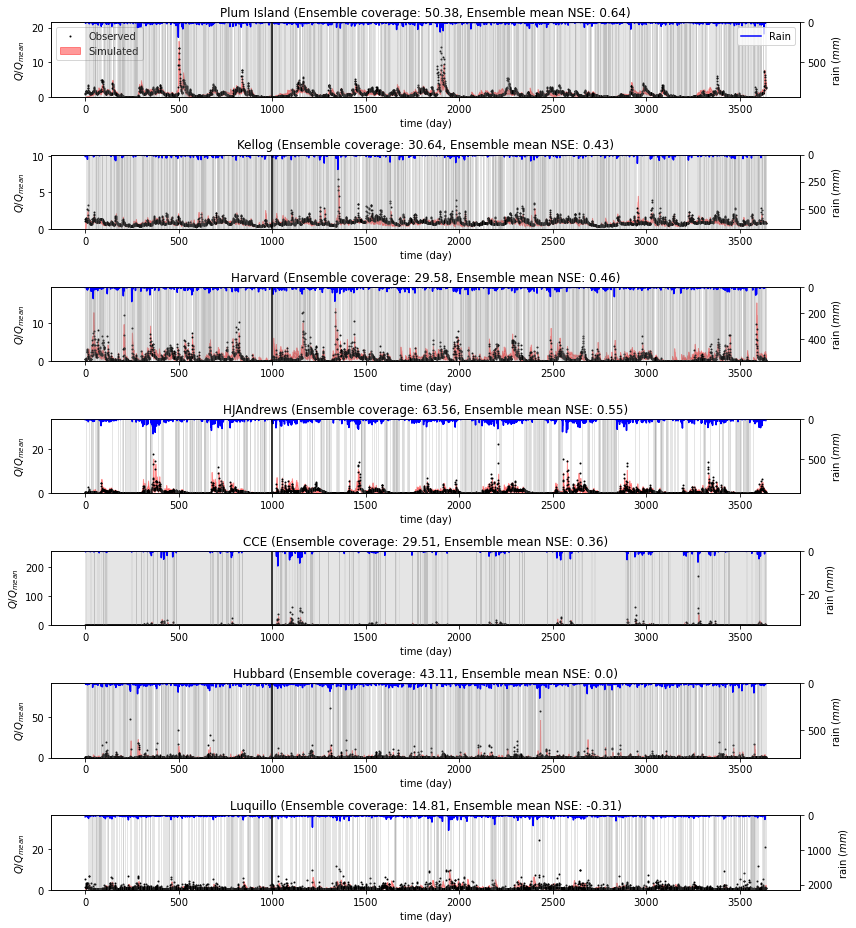

In [14]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(7, figsize=(12, 13))
name =['{}{}{}{}{}'.format("Plum Island (Ensemble coverage: ", np.around(pc[0], decimals =2),", Ensemble mean NSE: ", np.around(ns[0], decimals =2),")"),
       '{}{}{}{}{}'.format("Kellog (Ensemble coverage: ", np.around(pc[1], decimals =2),", Ensemble mean NSE: ", np.around(ns[1], decimals =2),")"),
       '{}{}{}{}{}'.format("Harvard (Ensemble coverage: ", np.around(pc[2], decimals =2),", Ensemble mean NSE: ", np.around(ns[2], decimals =2),")"),
       '{}{}{}{}{}'.format("HJAndrews (Ensemble coverage: ", np.around(pc[3], decimals =2),", Ensemble mean NSE: ", np.around(ns[3], decimals =2),")"),
       '{}{}{}{}{}'.format("CCE (Ensemble coverage: ", np.around(pc[4], decimals =2),", Ensemble mean NSE: ", np.around(ns[4], decimals =2),")"),
       '{}{}{}{}{}'.format("Hubbard (Ensemble coverage: ", np.around(pc[5], decimals =2),", Ensemble mean NSE: ", np.around(ns[5], decimals =2),")"),
       '{}{}{}{}{}'.format("Luquillo (Ensemble coverage: ", np.around(pc[6], decimals =2),", Ensemble mean NSE: ", np.around(ns[6], decimals =2),")")]


for i in range(7):
    
    ax_right = ax_left[i].twinx()
    
    #ax_left[i].plot(discharge_sim_en[i,:,10:20],color='red',linewidth=1)
    ax_left[i].plot(discharge_obs[i,:], '.',color='black',markersize =2)

    
    ax_left[i].fill_between(np.linspace(0., 3640, 3640),np.percentile(discharge_sim_en[i,:,:], 5, axis=1), np.percentile(discharge_sim_en[i,:,:], 95, axis=1), color='red', alpha=0.4)
    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,:], color='blue')
    ax_right.fill_between(range(len(rain_obs[i,:])), min(rain_obs[i,:]), 3640, where=(rain_obs[i,:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,:])])
    ax_right.set_ylim([5*max(rain_obs[i,:]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()
    
    plt.axvline(x=1000, color = 'black',label = "Calibration to validation")

#plt.savefig('images/hydrograph7_.jpg',dpi = 150)

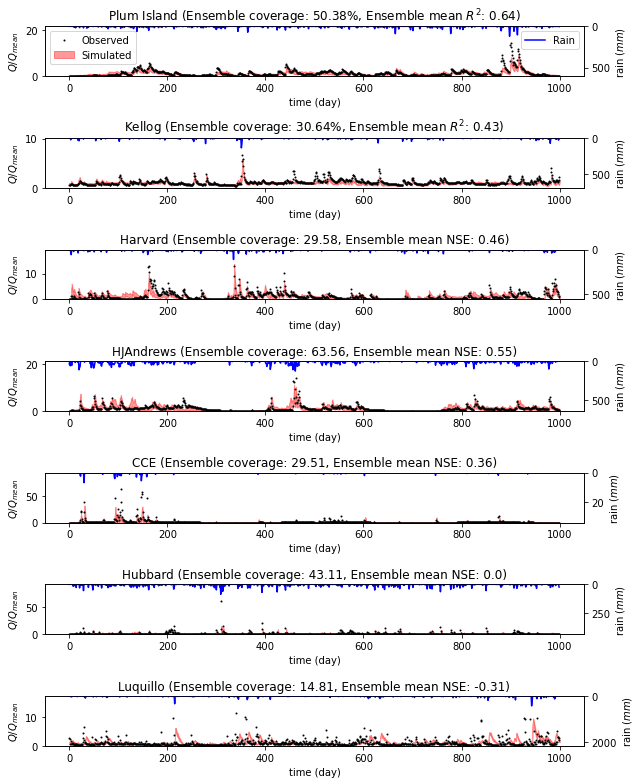

In [15]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(7, figsize=(9,11))
name =['{}{}{}{}{}'.format(r"Plum Island (Ensemble coverage: ", np.around(pc[0], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[0], decimals =2),")"),
       '{}{}{}{}{}'.format(r"Kellog (Ensemble coverage: ", np.around(pc[1], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[1], decimals =2),")"),
       '{}{}{}{}{}'.format("Harvard (Ensemble coverage: ", np.around(pc[2], decimals =2),", Ensemble mean NSE: ", np.around(ns[2], decimals =2),")"),
       '{}{}{}{}{}'.format("HJAndrews (Ensemble coverage: ", np.around(pc[3], decimals =2),", Ensemble mean NSE: ", np.around(ns[3], decimals =2),")"),
       '{}{}{}{}{}'.format("CCE (Ensemble coverage: ", np.around(pc[4], decimals =2),", Ensemble mean NSE: ", np.around(ns[4], decimals =2),")"),
       '{}{}{}{}{}'.format("Hubbard (Ensemble coverage: ", np.around(pc[5], decimals =2),", Ensemble mean NSE: ", np.around(ns[5], decimals =2),")"),
       '{}{}{}{}{}'.format("Luquillo (Ensemble coverage: ", np.around(pc[6], decimals =2),", Ensemble mean NSE: ", np.around(ns[6], decimals =2),")")]

init = 1000
end  = 2000
for i in range(7):
    
    ax_right = ax_left[i].twinx()
    
    #ax_left[i].plot(discharge_sim_en[i,init:end,10:13],color='red',linewidth=1)
    ax_left[i].plot(discharge_obs[i,init:end], '.',color='black',markersize =2)

    ax_left[i].fill_between(np.linspace(0, end-init, end-init),np.percentile(discharge_sim_en[i,init:end,:], 5, axis=1), np.percentile(discharge_sim_en[i,init:end,:], 95, axis=1), color='red', alpha=0.4)
    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,init:end], color='blue')
    #ax_right.fill_between(range(len(rain_obs[i,init:])), min(rain_obs[i,init:]), 3000, where=(rain_obs[i,init:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,init:end])])
    ax_right.set_ylim([5*max(rain_obs[i,init:end]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()
    
    #plt.axvline(x=2000, color = 'black',label = "Calibration to validation")
    
plt.savefig('images/hydrograph7.jpg',dpi = 150)

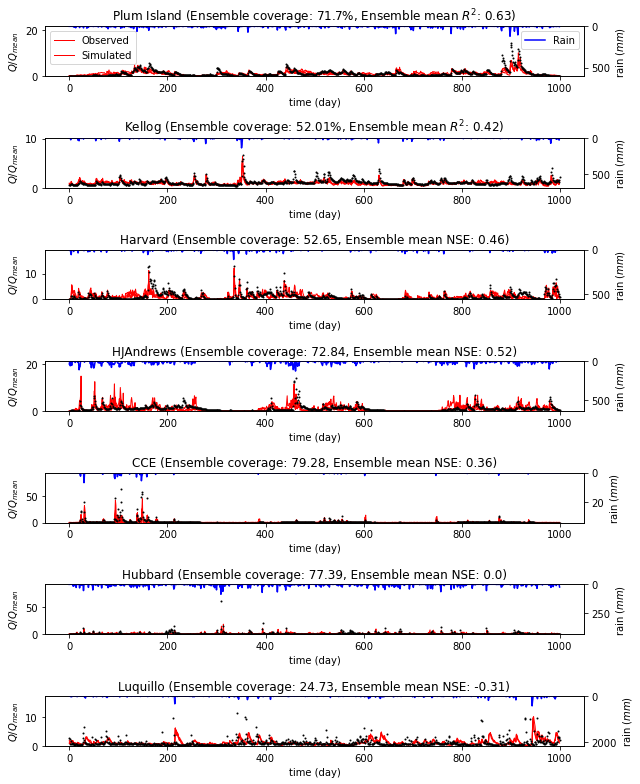

In [305]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(7, figsize=(9,11))
name =['{}{}{}{}{}'.format(r"Plum Island (Ensemble coverage: ", np.around(pc[0], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[0], decimals =2),")"),
       '{}{}{}{}{}'.format(r"Kellog (Ensemble coverage: ", np.around(pc[1], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[1], decimals =2),")"),
       '{}{}{}{}{}'.format("Harvard (Ensemble coverage: ", np.around(pc[2], decimals =2),", Ensemble mean NSE: ", np.around(ns[2], decimals =2),")"),
       '{}{}{}{}{}'.format("HJAndrews (Ensemble coverage: ", np.around(pc[3], decimals =2),", Ensemble mean NSE: ", np.around(ns[3], decimals =2),")"),
       '{}{}{}{}{}'.format("CCE (Ensemble coverage: ", np.around(pc[4], decimals =2),", Ensemble mean NSE: ", np.around(ns[4], decimals =2),")"),
       '{}{}{}{}{}'.format("Hubbard (Ensemble coverage: ", np.around(pc[5], decimals =2),", Ensemble mean NSE: ", np.around(ns[5], decimals =2),")"),
       '{}{}{}{}{}'.format("Luquillo (Ensemble coverage: ", np.around(pc[6], decimals =2),", Ensemble mean NSE: ", np.around(ns[6], decimals =2),")")]

init = 1000
end  = 2000
for i in range(7):
    
    ax_right = ax_left[i].twinx()
    
    ax_left[i].plot(discharge_sim_en[i,init:end,10:13],color='red',linewidth=1)
    ax_left[i].plot(discharge_obs[i,init:end], '.',color='black',markersize =2)

    #ax_left[i].fill_between(np.linspace(0, end-init, end-init),np.percentile(discharge_sim_en[i,init:end,:], 5, axis=1), np.percentile(discharge_sim_en[i,init:end,:], 95, axis=1), color='red', alpha=0.4)
    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,init:end], color='blue')
    #ax_right.fill_between(range(len(rain_obs[i,init:])), min(rain_obs[i,init:]), 3000, where=(rain_obs[i,init:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,init:end])])
    ax_right.set_ylim([5*max(rain_obs[i,init:end]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()
    
    #plt.axvline(x=2000, color = 'black',label = "Calibration to validation")
    
plt.savefig('images/hydrograph7_samples.jpg',dpi = 150)

# Make dynamic probability plot

In [306]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [307]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [308]:
save_folder = 'images/dynamicprobability'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

/home/owani/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


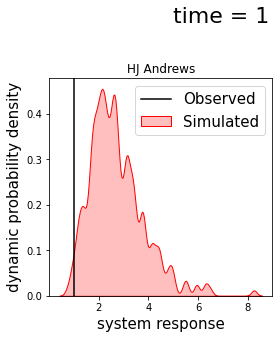

In [309]:
init = 530
end  = 600

data =  discharge_sim_en[0,init+0,:].flatten() #Generating data.
plt.figure(figsize = (4,4))
sns.kdeplot(data , bw = 0.1, color ="red" , fill = True)
plt.axvline(1 , 0,1, color = 'black')
plt.ylabel('dynamic probability density', fontsize = 15)
plt.xlabel('system response', fontsize = 15)
plt.legend(framealpha=1, frameon=True)
plt.legend(['Observed','Simulated'], loc = 'upper right' ,fontsize = 15)
plt.title('HJ Andrews')
plt.text(5, 0.6, '{}{}'.format(r"time = ",1), fontsize = 22)
plt.show()

In [310]:
init = 490
end  = 530

def plot_phase(n):
   data = discharge_sim_en[0,init+n,:].flatten() #Generating data.
   max1 = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (6,3.5))
   sns_plot = sns.kdeplot(data , bw = 0.4, color ="red" , fill = True)
   #plt.axvline(max1, 0,1, color = 'red')
   plt.axvline(discharge_obs[0,init+n], 0,1, color = 'black')
   plt.xlim(0, 20)
   plt.ylim(0, 1.0)   
   plt.ylabel('dynamic probability density', fontsize = 18)
   plt.xlabel(r'system response (runoff: $Q/Q_{mean}$)', fontsize = 18)
   plt.legend(framealpha=1, frameon=True)
   plt.title('Plum Island',fontsize = 20)
   plt.text(13.0, 0.3, '{}{}'.format(r"time = ",500+n), fontsize = 18)
   plt.legend(['Observation','Simulation'], loc = 'upper right' ,fontsize = 18)
   plt.xticks(fontsize=10)
   #plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [311]:
%%capture

for n in range(21):
    plot_phase(n)

In [312]:
# load all the static images into a list
save_folder = 'images/dynamicprobability'
images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(save_folder)))]
gif_filepath = 'images/animated-dynamicprob_PlumIsland.gif'

# save as an animated gif
gif = images[0]
gif.info['duration'] = 300 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:],quality=50)

# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) 

True

# Make multiple recession plots

In [313]:
# Manually choose the sections of hydrograph where recession will be shown

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


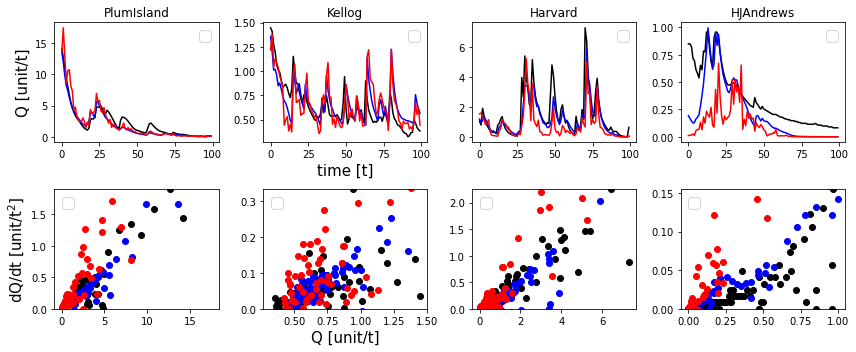

In [314]:
#Plotting all the lines together

fig, ax = plt.subplots(2,4, figsize=(12, 5))
name=["PlumIsland","Kellog","Harvard","HJAndrews","CCE","Hubbard","Luquillo"]
np.random.seed(4000)

for i in [0,1,2,3]:
    
    Q = np.array(discharge_obs[i,:])
    param = paroptim_sde[i,:]
    #param[6]=0.5
    Qsim = sde(param, rain_obs[i,:], Temp_obs[i,:],runs =10)[:,5]#.flatten()
    
    param2 = np.append(paroptim_sde[i,0:6],0)
    Qode = sde(param2, rain_obs[i,:], Temp_obs[i,:],runs =2)[:,1]#.flatten()
    
    indices0 = 1520
    indices0 = 520
    
    q0 = Q[(indices0-20):(indices0+80)]
    diff0 =np.append(-np.diff(q0),0)

    
    
    qsim0 = Qsim[(indices0-20):(indices0+80)]
    diffsim0 =np.append(-np.diff(qsim0),0)

    
    qode0 = Qode[(indices0-20):(indices0+80)]
    diffode0 =np.append(-np.diff(qode0),0)
   
    
    ax[0,i].plot(q0, color = "black")
    ax[0,i].set_title(f"{name[i]}")
    ax[0,i].plot(qode0, color = "blue")
    ax[0,i].plot(qsim0, color = "red")
    
    
    ax[0,i].legend( loc = 'upper right')
    
    ax[0,i].legend(loc ='best',fontsize = 15)
    ax[0,0].set_ylabel('Q [unit/t]', fontsize = 15)
    ax[0,1].set_xlabel('time [t]', fontsize = 15)
    
   
    ax[1,i].scatter(x=q0,y=diff0, color = "black")
    ax[1,i].scatter(x=qode0,y=diffode0, color = "blue")
    ax[1,i].scatter(x=qsim0,y=diffsim0, color = "red")
    ax[1,i].set_ylim([0,np.max(diff0)])
    
    #ax[1,i].set_xscale("log")
    #ax[1,i].set_yscale("log")
    
    ax[1,i].legend(loc ='upper left',fontsize = 15)
    ax[1,0].set_ylabel('dQ/dt [unit/t$^2$]', fontsize = 15)
    ax[1,1].set_xlabel('Q [unit/t]', fontsize = 15)
    
    
    Ty = ["Obs","ODE", "SDE"]
    #Value = [np.sum(np.absolute(diff0))/np.sum(q0), np.sum(np.absolute(diffode0))/np.sum(qode0), np.sum(np.absolute(diffsim0))/np.sum(qsim0)]
    Value = [np.sum(np.absolute(np.append(-np.diff(Q),0)))/np.sum(Q), np.sum(np.absolute(np.append(-np.diff(Qode),0)))/np.sum(Qode), np.sum(np.absolute(np.append(-np.diff(Qsim),0)))/np.sum(Qsim)]
   
    df =pd.DataFrame({"Type":Ty, "Value":Value})
    #df.set_index('ID', inplace=True)
    
    #ax[2,i].bar(x=Ty, height = Value)
    #ax[2,0].set_ylabel('Flashiness Index', fontsize = 15)
    
  
    plt.tight_layout()

#fig.suptitle('Comparing four sections of hydrograph with streamflow recession: Observations vs SDE vs ODE',y=1.04,fontsize = 15)
plt.savefig('images/comparison_recession3.jpeg',bbox_inches='tight',dpi = 150)

In [315]:
# Make interactive plot to identify the smooth recession in ODEs
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [316]:
i = 2

Q = np.array(discharge_obs[i,:])
param = paroptim_sde[i,:]
#param[6]=0.5
Qsim = sde(param, rain_obs[i,:], Temp_obs[i,:],runs =20)[:,10:14]#.flatten()

param2 = paroptim_sde[i,:]
param2[6]=0.0
Qode = sde(param2, rain_obs[i,:], Temp_obs[i,:],runs =3)[:,2]#.flatten()

data = pd.DataFrame({"obs":Q,"ode":Qode})
data1 = pd.DataFrame({"obs":Q,"ode":Qode,"sde1":Qsim[:,1],"sde2":Qsim[:,2],"sde3":Qsim[:,3]})

In [317]:
data.plot_bokeh(kind='line')

Figure(id='2634', ...)

In [318]:
data1.plot_bokeh(kind='line')

Figure(id='2777', ...)

# Create the distribution for the three highest flows

In [319]:
i= 6
values = np.sort(discharge_obs[i,np.array(sg.argrelextrema(discharge_obs[i,:], np.greater)).ravel()])[::-1][[0,5,10]]

in0 = np.array(np.where(discharge_obs[i,:]==values[0]))[0]
in0[0] 

2424

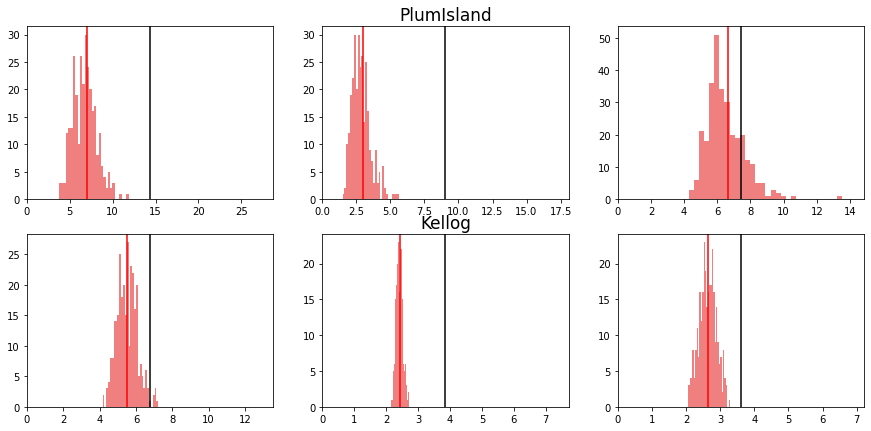

In [320]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
name=["PlumIsland","Kellog","Harvard","HJAndrews","CCE","Hubbard","Luquillo"]
bw =[0.2,0.1,0.1,2,2,2,2]

for i in range(2):

    values = np.sort(discharge_obs[i,np.array(sg.argrelextrema(discharge_obs[i,:], np.greater)).ravel()])[::-1][[0,3,4]]

    in0 = np.array(np.where(discharge_obs[i,:]==values[0]))[0]
    in1 = np.where(discharge_obs[i,:]==values[1])[0]
    in2 = np.where(discharge_obs[i,:]==values[2])[0]
    
    in0 = in0[0]
    in1 = in1[0]
    in2 = in2[0]
    
    sim0 = discharge_sim_en[i,in0,:] #Generating data.
    sim1 = discharge_sim_en[i,in1,:] #Generating data.
    sim2 = discharge_sim_en[i,in2,:] #Generating data.

    ode_sim =sde(np.append(paroptim_sde[i,0:6],0), (rain_obs[i,:]), Temp_obs[i,:],runs =1).flatten()

    ode0 =   ode_sim[in0] # ODE value
    ode1 =   ode_sim[in1]
    ode2 =   ode_sim[in2]

    #sns.kdeplot(ax =ax[i,0], data = sim0.flatten() , bw = bw[i], color = "red")
    #sns.kdeplot(ax =ax[i,1], data = sim1.flatten() , bw = bw[i], color = "red")
    #sns.kdeplot(ax =ax[i,2], data = sim2.flatten() , bw = bw[i], color = "red")
    
    ax[i,0].hist(sim0.flatten() , bins=30, color ="lightcoral")
    ax[i,1].hist(sim1.flatten() , bins=30, color ="lightcoral")
    ax[i,2].hist(sim2.flatten() , bins=30, color ="lightcoral")
    
    ax[i,0].axvline(x=ode0, ymin=0, ymax=1, color = 'red')
    #ax[i,0].text(0.7,0.9,in0, horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
    ax[i,1].axvline(x=ode1, ymin=0, ymax=1, color = 'red')
    #ax[i,1].text(1.8,0.9,in1, horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
    ax[i,2].axvline(x=ode2, ymin=0, ymax=1, color = 'red')
    #ax[i,2].text(2.8,0.9,in2, horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
   
    
    ax[i,0].axvline(x=discharge_obs[i,in0], ymin=0, ymax=1, color = 'black')
    ax[i,1].axvline(x=discharge_obs[i,in1], ymin=0, ymax=1, color = 'black')
    ax[i,2].axvline(x=discharge_obs[i,in2], ymin=0, ymax=1, color = 'black')
    ax[i,1].set_title(f"{name[i]}",fontsize=17)
    
    ax[i,0].set_xlim([0, 2*discharge_obs[i,in0]])
    ax[i,1].set_xlim([0, 2*discharge_obs[i,in1]])
    ax[i,2].set_xlim([0, 2*discharge_obs[i,in2]])
    

plt.savefig('images/ensembledistribution.jpeg',dpi = 150) #bbox_inches='tight'

# Plot for cumulative statistics

In [321]:
# ODE 
discharge_ode = np.zeros([7,3640,1])

for i in range(7):
    discharge_ode[i,:,:] = sde(np.append(paroptim_sde[i,0:6],0), (rain_obs[i,:]), Temp_obs[i,:],runs =1)

-31.752306302588195 -22.99524727374015
-30.593719359129786 -27.482786352125256
-26.221801986407446 -19.806002468943504
-35.934780752516595 -13.86683209752605
-29.094338523203657 -19.324382571301417
-49.624249037086095 -47.73783578343826
-29.79137806490196 -26.732366515140438


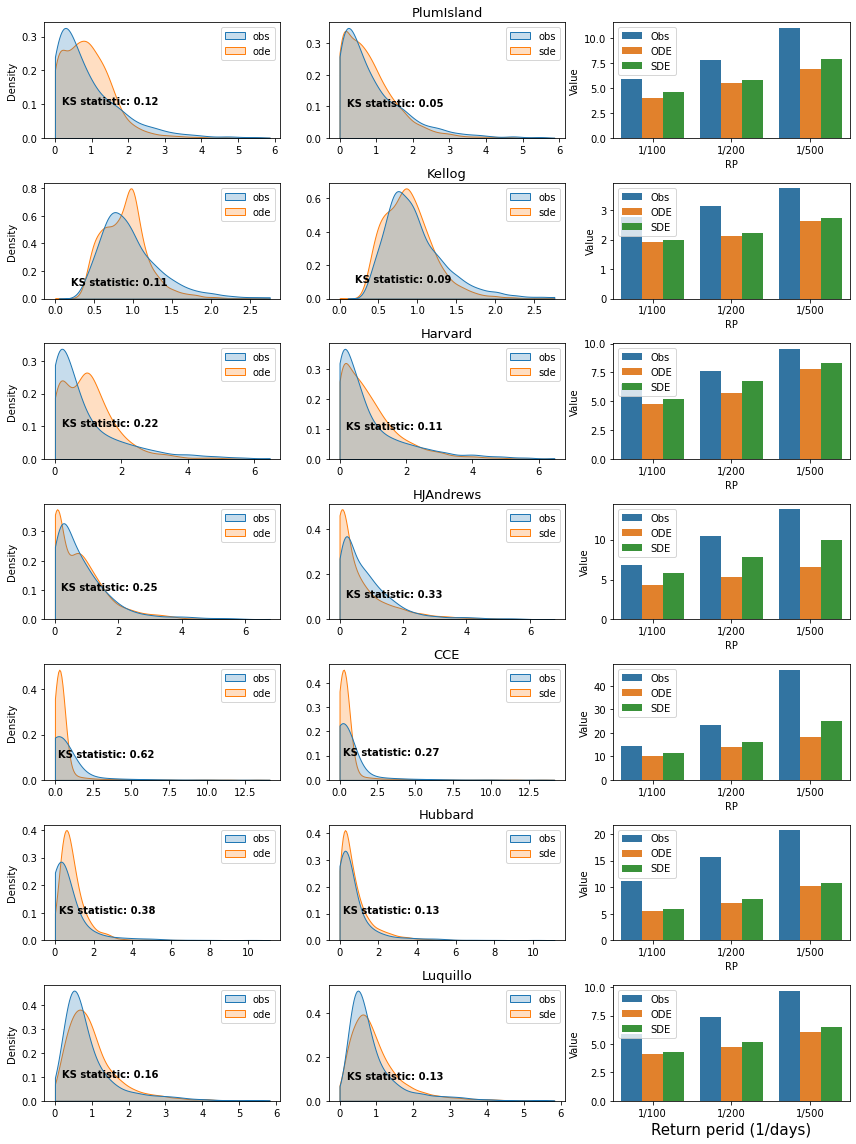

In [322]:
fig, axes = plt.subplots(7,3, figsize=(12, 16))
name=["PlumIsland","Kellog","Harvard","HJAndrews","CCE","Hubbard","Luquillo"]
#fig.suptitle('Initial Pokemon - 1st Generation')

from scipy.special import rel_entr

for i in range(7):
    
        
    data_sde = pd.DataFrame({"obs":np.repeat(discharge_obs[i,:],3),"sde":np.random.choice(discharge_sim_en[i,:,:].flatten(), size =10920)})
    data_ode = pd.DataFrame({"obs":discharge_obs[i,:],"ode":discharge_ode[i,:,0]})
    

    sns.kdeplot(ax=axes[i,0], data=data_ode, fill=True, clip =[0,np.percentile(discharge_obs[i,:], 99)])
    sns.kdeplot(ax=axes[i,1],data=data_sde,  fill=True, clip =[0,np.percentile(discharge_obs[i,:], 99)])
    axes[i,1].set_title(f"{name[i]}", fontsize =13)
    axes[i,1].set(ylabel = "")
    
    #X= ["1/100", "1/200", "1/500"]
    #X_axis = np.arange(len(X))
    
    obs_pr = np.quantile(data_sde["obs"], [.99,0.995,0.998])    
    sde_pr = np.quantile(data_sde["sde"], [.99,0.995,0.998])
    ode_pr = np.quantile(data_ode["ode"], [.99,0.995,0.998])
    print((ode_pr[0]-obs_pr[0])/obs_pr[0]*100,(sde_pr[0]-obs_pr[0])/obs_pr[0]*100)

    X = ["1/100", "1/200", "1/500","1/100", "1/200", "1/500","1/100", "1/200", "1/500"]
    Ty = ["Obs", "Obs", "Obs","ODE", "ODE", "ODE","SDE", "SDE", "SDE"]
    Value = np.concatenate([obs_pr,ode_pr,sde_pr])
    df =pd.DataFrame({"RP":X,"Type":Ty, "Value":Value})
    #df.set_index('ID', inplace=True)
    
    sns.barplot(ax=axes[i,2], x="RP", y="Value", hue="Type",  data=df)

    if (i==6):
        
        axes[i,2].set_xlabel("Return perid (1/days)", fontsize=15)
        
    #axes[i,2].ylabel("Q [m*3/s]", fontsize=10)
    #if (i==0):
    axes[i,2].legend()
        
        
    
    
        #axes[i,2].ylabel("Q [m*3/s]", fontsize=10)
    if (i==0):
        axes[i,2].legend()

    p = np.array(data_ode["obs"])
    q = np.array(data_ode["ode"])

    ks_ode = stats.ks_2samp(p, q).statistic
    #print('KS(Obs || ODE):' , ks_ode) 
          
    p = np.array(data_sde["obs"])
    q = np.array(data_sde["sde"])
    
    ks_sde = stats.ks_2samp(p, q).statistic
    #print('KS(Obs || SDE):', ks_sde)
    
    axes[i,0].text(0.2, 0.1, "KS statistic: {}".format(np.around(ks_ode, decimals =2)), horizontalalignment='left', size='medium', color='black', weight='semibold')
    axes[i,1].text(0.2, 0.1, "KS statistic: {}".format(np.around(ks_sde, decimals =2)), horizontalalignment='left', size='medium', color='black', weight='semibold')
    
fig.tight_layout(h_pad=1, w_pad=0.5)  
plt.savefig('images/cumulativedistribution.jpeg',dpi = 150,bbox_inches='tight')



# Performance metrics

In [323]:
# Reliability
n=np.zeros(7)

for i in range(7):
    ci5 = np.percentile(discharge_sim_en[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_sim_en[i,:,:], 95, axis=1)
    for j in range(1000,3640):
        if   ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]: 
            n[i] = n[i]+1

pc = n/2640*100
print(pc)            

# Reliability
ns=np.zeros(7)

for i in range(7):
    mn = np.mean(discharge_sim_en[i,1000:3640,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,1000:3640]-mn)**2)/np.mean((discharge_obs[i,1000:3640]-np.mean(discharge_obs[i,1000:3640]))**2)
    
print(ns)

[71.70454545 52.00757576 52.65151515 72.84090909 79.28030303 77.38636364
 24.73484848]
[ 0.62503528  0.41819876  0.46283583  0.51895624  0.35585106  0.0035254
 -0.30619749]


# Percentile plot

In [324]:
np.mean(discharge_sim_en[i,:,:], axis = 1)

array([0.        , 0.7738547 , 0.64964409, ..., 1.69274534, 1.39546343,
       1.23542096])

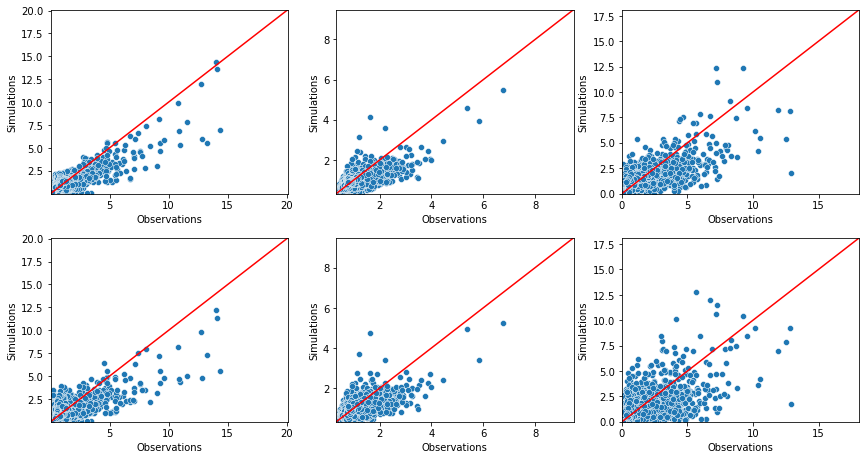

In [325]:
fig, axes = plt.subplots(2,3, figsize=(12, 6.5))

for i in range(3):
    data_sde = pd.DataFrame()
    data_ode = pd.DataFrame()
    
    data_sde['Observations'] = (discharge_obs[i,:])
    #data_sde['Simulations'] =  (np.mean(discharge_sim_en[i,:,:], axis = 1))
    data_sde['Simulations'] =  ((discharge_sim_en[i,:,5]))
    
    data_ode['Observations'] = (discharge_obs[i,:])
    data_ode['Simulations'] =  (discharge_ode[i,:,:].flatten())

    X_plot = np.linspace(0.0*max(discharge_obs[i,:]) , 1.4*max(discharge_obs[i,:]), 100)
    Y_plot = np.linspace(0.0*max(discharge_obs[i,:]) , 1.4*max(discharge_obs[i,:]), 100)
     
    f1 = sns.scatterplot(ax=axes[0,i], data = data_ode, x="Observations", y="Simulations")
    f2 = sns.scatterplot(ax=axes[1,i], data = data_sde, x="Observations", y="Simulations")
    axes[0,i].plot(X_plot, Y_plot, color='r')
    axes[1,i].plot(X_plot, Y_plot, color='r')
    f1.set_xlim(np.percentile(discharge_obs[i,:],0), 1.4*max(discharge_obs[i,:]))
    f1.set_ylim(np.percentile(discharge_obs[i,:],0), 1.4*max(discharge_obs[i,:]))
    
    f2.set_xlim(np.percentile(discharge_obs[i,:],0), 1.4*max(discharge_obs[i,:]))
    f2.set_ylim(np.percentile(discharge_obs[i,:], 0), 1.4*max(discharge_obs[i,:]))

    #axes[1,i].set(ylim=(0, 1.3*max(discharge_obs[i,:]))
    
    
fig.tight_layout(h_pad=1, w_pad=0.5)  

# TE

In [53]:
from PyIF import te_compute as te
rand = np.random.RandomState(seed=23)

TE=np.zeros([7,3,3])

for i in range(7):
    for j in range(3):
        X = rain_obs[i,:]/10
        Y_obs = discharge_obs[i,:]
        Y_sde = sde(np.append(paroptim_sde[i,0:6],j*paroptim_sde[i,6]), (rain_obs[i,:]), Temp_obs[i,:],runs =10)[:,0].flatten()
        Y_ode = sde(np.append(paroptim_sde[i,0:6],0), (rain_obs[i,:]), Temp_obs[i,:],runs =1).flatten()

        TE[i,0,j] = te.te_compute(X[1000:3640], Y_obs[1000:3640], k=1, embedding=1, safetyCheck=False, GPU=False) # embedding is the lag
        TE[i,1,j] = te.te_compute(X[1000:3640],Y_sde[1000:3640], k=1, embedding=1, safetyCheck=False, GPU=False)
        TE[i,2,j] = te.te_compute(X[1000:3640], Y_ode[1000:3640], k=1, embedding=1, safetyCheck=False, GPU=False)
# we find that the first lag has the highest entropy

/home/owani/anaconda3/lib/python3.8/site-packages/numba/core/decorators.py:232: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [54]:
sde

<function __main__.sde(par, rain, Temp, runs, dt=1, T=3640)>

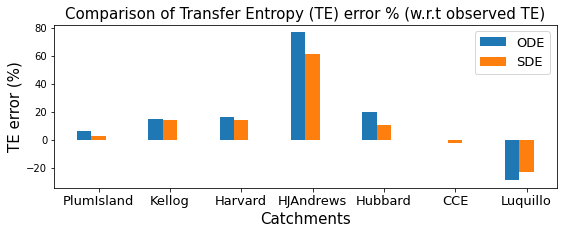

In [55]:
plt.figure(figsize=(9, 3))

j=1
X = ["PlumIsland","Kellog","Harvard","HJAndrews","Hubbard","CCE","Luquillo"]
sde = (TE[:,1,j]-TE[:,0,j])/TE[:,0,j]*100
ode = (TE[:,2,j]-TE[:,0,j])/TE[:,0,j]*100

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, ode, width = 0.2, label = 'ODE')
plt.bar(X_axis + 0., sde, width = 0.2, label = 'SDE')
#plt.bar(X_axis + 0.2, obs, width = 0.2, label = 'Observed')
  
plt.xticks(X_axis, X, fontsize=13)
plt.xlabel("Catchments", fontsize=15)
plt.ylabel("TE error (%)", fontsize=15)
plt.title("Comparison of Transfer Entropy (TE) error % (w.r.t observed TE)",fontsize=15)
plt.legend(fontsize=13)

plt.savefig('images/te.jpeg',bbox_inches='tight')
plt.show()

# Store important variables

In [26]:
%store discharge_sim_en

Stored 'discharge_sim_en' (ndarray)
